In [ ]:
import pandas as pd
import numpy as np

# Read Data set

In [ ]:
train_path = "/content/optdigits.tra" 
df_train = pd.read_csv(train_path, header=None)

In [ ]:
X_train = df_train[np.arange(64)] #Train Data without class label
Y_train = df_train[64] #Class Label

#Standardization of the data set

In [ ]:
X_train = (X_train - np.mean(X_train)) / (np.std(X_train) + 1e-8)

# Tanh Activation Function

In [ ]:
def tanh_activation(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# MSE Loss Function

In [ ]:
def mse_loss(actual, pred):
  loss = 1/2 * np.mean(np.asarray(pred - actual)**2)
  return loss

#Initialize First Parameters

In [ ]:
def initialize_parameters(n_input_units,n_hidden_units,n_output_units):
  np.random.seed(1)

  #Hidden layer weights and bias
  W_hid = np.random.randn(n_hidden_units, n_input_units)*0.01
  b_hid = np.zeros((n_hidden_units,1)) 

  #Output layer weights and bias
  W_out = np.random.randn(n_output_units, n_hidden_units)*0.01 
  b_out = np.zeros((n_output_units,1))

  parameters = {"W_hid" : W_hid,
                        "b_hid" : b_hid,
                        "W_out" : W_out,
                        "b_out" : b_out}

  return parameters

# Forward Propagation

In [ ]:
def forward_propagation(X_train,parameters):

    hidden_val = np.dot(parameters["W_hid"],X_train) + parameters["b_hid"]
    hidden_activation = tanh_activation(hidden_val)

    output_val = np.dot(parameters["W_out"],hidden_activation)+ parameters["b_out"]


    save_vals = {'hidden_val': hidden_val,
                 'hidden_activation': hidden_activation,
                 'output_val': output_val
                 }
    
    return output_val , save_vals

# Backward Propagation

In [ ]:
def backward_propagation(X_train,parameters,forward_save_parameters,batch_size):

    output = forward_save_parameters["output_val"]- X_train
    output = np.asarray(output)

    deriv_output_w = np.dot(output, forward_save_parameters["hidden_activation"].T)/batch_size
    deriv_output_b = np.sum(output, axis=1,keepdims=True) / batch_size

    deriv_hidden = np.dot(parameters["W_out"].T, output) * (1 - np.power(forward_save_parameters["hidden_val"], 2))
    deriv_hidden_w = np.dot(deriv_hidden, X_train.T) /batch_size
    deriv_hidden_b = np.sum(deriv_hidden, axis=1,keepdims=True) / batch_size

    gradients = {'deriv_hidden_w': deriv_hidden_w,
                 'deriv_hidden_b': deriv_hidden_b,
                 'deriv_output_w': deriv_output_w,
                 'deriv_output_b': deriv_output_b}
    
    return gradients

# Update Parameters

In [ ]:
def update_parameters(parameters, gradients, learning_rate = 0.001):

    W_hid = parameters["W_hid"] - learning_rate * gradients["deriv_hidden_w"]
    b_hid = parameters["b_hid"] - learning_rate * gradients["deriv_hidden_b"]
    W_out = parameters["W_out"] - learning_rate * gradients["deriv_output_w"]
    b_out = parameters["b_out"] - learning_rate * gradients["deriv_output_b"]

    update_parameters = {"W_hid" : W_hid,
                        "b_hid" : b_hid,
                        "W_out" : W_out,
                        "b_out" : b_out}
    
    return update_parameters

# Create Mini-Batchs

In [ ]:
def create_batchs(X_train,batch_size):
    batch_x = []

    len_data = len(X_train)
    for i in range(0, len_data, batch_size):
        if i + batch_size <= len_data:
            batch_x.append(X_train[i:i+batch_size])
        else:
            batch_x.append(X_train[i:])
    return batch_x

# Calculate Accuracy

In [ ]:
def accuracy(pred,actual):  
  return np.all(np.asarray(pred)==np.asarray(actual),axis=1).mean()

# Train Data with multiple epochs and using mini-batch

In [ ]:
def MLP_train(X_train, n_input_unit, n_hidden_unit,n_output_unit,batch_size,epochs = 100):

  parameters = initialize_parameters(n_input_unit, n_hidden_unit, n_output_unit)
  batch_X = create_batchs(X_train,batch_size)
  
  for epoch in range(epochs):
    cost = 0
    train_acc = 0
    for batch_x in batch_X:
      output , save_vals = forward_propagation(batch_x.T, parameters) #Feed forward
      cost += mse_loss(batch_x.T,output+ 1e-10) #Calculate loss
      gradients = backward_propagation(batch_x.T,parameters,save_vals,batch_size) #Backward
      
      parameters = update_parameters(parameters, gradients) #Update parameters
    
    cost = (cost/len(batch_X))
    print(f"Epoch {epoch+1}: loss = {cost}")
  return parameters

# Learn parameters on train dataset

- Number of Input Units: 64
- Number of Hidden Layer: 1
- Number of Hidden Layer Units: 2
- Number of Output Units: 64
- Batch Size: 128
- Epoch : 100

In [ ]:
parameters = MLP_train(X_train, 64, 2, 64, 128)

Epoch 1: loss = 0.48456216982511185
Epoch 2: loss = 0.4845352422896502
Epoch 3: loss = 0.4845067001181976
Epoch 4: loss = 0.4844733386317102
Epoch 5: loss = 0.4844311575769019
Epoch 6: loss = 0.4843747908999172
Epoch 7: loss = 0.48429679459741165
Epoch 8: loss = 0.48418677550845146
Epoch 9: loss = 0.48403041884564
Epoch 10: loss = 0.4838086302796577
Epoch 11: loss = 0.4834972757451625
Epoch 12: loss = 0.48306832320656545
Epoch 13: loss = 0.48249330548226504
Epoch 14: loss = 0.48174943187617525
Epoch 15: loss = 0.48082703157820617
Epoch 16: loss = 0.4797350175629648
Epoch 17: loss = 0.47850072862516846
Epoch 18: loss = 0.4771632325438569
Epoch 19: loss = 0.4757632411175568
Epoch 20: loss = 0.47433456260646667
Epoch 21: loss = 0.47290017123810385
Epoch 22: loss = 0.4714727507782532
Epoch 23: loss = 0.47005766023226797
Epoch 24: loss = 0.4686562494204545
Epoch 25: loss = 0.4672683591208849
Epoch 26: loss = 0.46589372601633816
Epoch 27: loss = 0.4645325135023349
Epoch 28: loss = 0.46318533

# Find the hidden layer values using parameters that learned from the train data

In [ ]:
def predict(X_train,parameters):
    y_pred, save_vals = forward_propagation(X_train, parameters)
    return save_vals

In [ ]:
save_vals = predict(X_train.T,parameters)

# Hidden Layer Output

In [ ]:
hidden_activation = save_vals["hidden_activation"].T

# Visualizing the output of the hidden layer 

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(X,Y):
    
    plt.figure(figsize=(15,15))
    colors=['black','blue','purple','yellow','magenta','red','lime','cyan','orange','gray']      
    for i in range(len(colors)):
      px = X[:,0][Y==i]
      py = X[:,1][Y==i]
      plt.scatter(px,py,c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('Hidden 1')
    plt.ylabel('Hidden 2')
    
    plt.show()

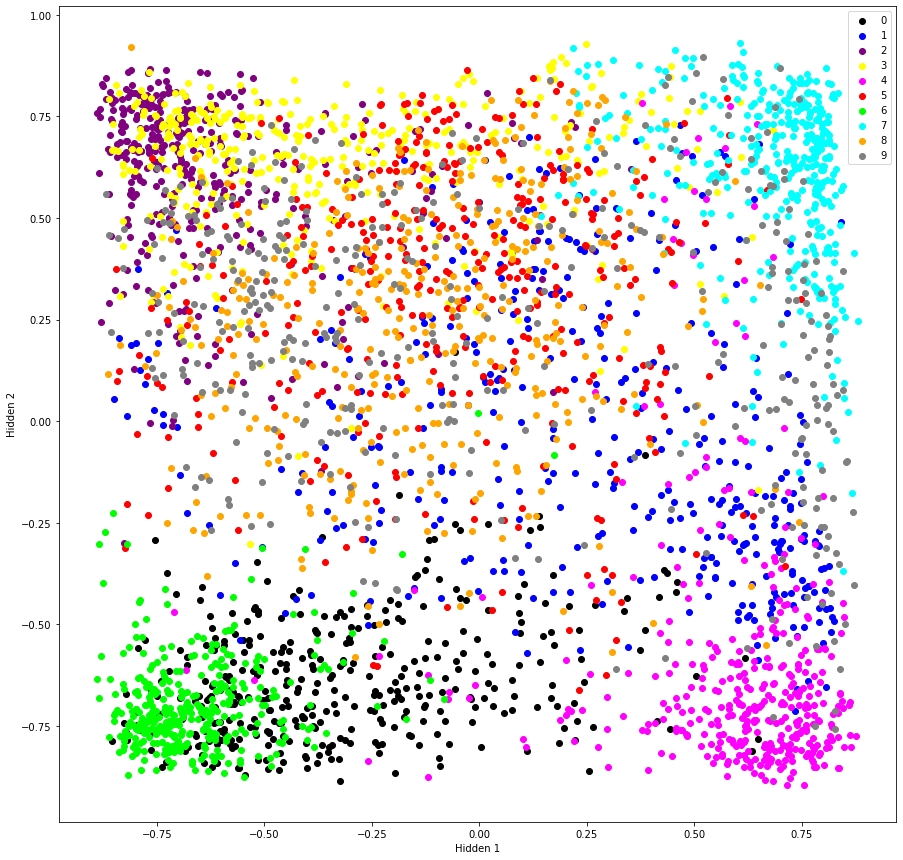

In [ ]:
plot_scatter(hidden_activation,Y_train)